In [323]:
!python --version

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

Python 3.8.5


In [324]:
df = pd.read_csv(r'C:\Users\William\Desktop\RTX_LD\combineddf q1-q4.csv')

In [325]:
df

,date,hour,report,region,type,participant,resource,mw
0,1/1/2019,1,RTX,LUZON,LD,WESMTMP,1ANGAT_T5L1,0.0
1,1/1/2019,1,RTX,LUZON,LD,WESM,1BALNEO_L01,50.4
2,1/1/2019,1,RTX,LUZON,LD,LUELCO,1BAUAN_T1L2,0.0
3,1/1/2019,1,RTX,LUZON,LD,WESM,1BINGA_T1L1,0.0
4,1/1/2019,1,RTX,LUZON,LD,WESM,1BOTOL_T1L2,13.8
...,...,...,...,...,...,...,...,...
2264431,2019-12-31,24,RTX,LUZON,LD,WESMTMP,3MLAYA_T2L2,44.6
2264432,2019-12-31,24,RTX,LUZON,LD,WESM,3NAG_CSRC2B,9.6
2264433,2019-12-31,24,RTX,LUZON,LD,WESM,3STAR_SS1,0.0
2264434,2019-12-31,24,RTX,LUZON,LD,WESM,3STAR_SS4,0.0


In [326]:
df.dtypes


date            object
hour             int64
report          object
region          object
type            object
participant     object
resource        object
mw             float64
dtype: object

In [327]:
df['date'] =  pd.to_datetime(df['date'], format='%Y/%m/%d',infer_datetime_format=True)

In [328]:
df

,date,hour,report,region,type,participant,resource,mw
0,2019-01-01,1,RTX,LUZON,LD,WESMTMP,1ANGAT_T5L1,0.0
1,2019-01-01,1,RTX,LUZON,LD,WESM,1BALNEO_L01,50.4
2,2019-01-01,1,RTX,LUZON,LD,LUELCO,1BAUAN_T1L2,0.0
3,2019-01-01,1,RTX,LUZON,LD,WESM,1BINGA_T1L1,0.0
4,2019-01-01,1,RTX,LUZON,LD,WESM,1BOTOL_T1L2,13.8
...,...,...,...,...,...,...,...,...
2264431,2019-12-31,24,RTX,LUZON,LD,WESMTMP,3MLAYA_T2L2,44.6
2264432,2019-12-31,24,RTX,LUZON,LD,WESM,3NAG_CSRC2B,9.6
2264433,2019-12-31,24,RTX,LUZON,LD,WESM,3STAR_SS1,0.0
2264434,2019-12-31,24,RTX,LUZON,LD,WESM,3STAR_SS4,0.0


In [329]:
df.dtypes

date           datetime64[ns]
hour                    int64
report                 object
region                 object
type                   object
participant            object
resource               object
mw                    float64
dtype: object

In [330]:
DF_2PACO_T1L1 = df[df['resource'] == '2PACO_T1L1']

In [331]:
DF_2PACO_T1L1

,date,hour,report,region,type,participant,resource,mw
138,2019-01-01,5,RTX,LUZON,LD,MERALCO,2PACO_T1L1,226.9
251,2019-01-01,9,RTX,LUZON,LD,MERALCO,2PACO_T1L1,232.8
592,2019-01-01,20,RTX,LUZON,LD,MERALCO,2PACO_T1L1,289.5
623,2019-01-01,21,RTX,LUZON,LD,MERALCO,2PACO_T1L1,290.8
842,2019-01-02,4,RTX,LUZON,LD,MERALCO,2PACO_T1L1,237.3
...,...,...,...,...,...,...,...,...
2263513,2019-12-30,21,RTX,LUZON,LD,MERALCO,2PACO_T1L1,348.8
2263825,2019-12-31,6,RTX,LUZON,LD,MERALCO,2PACO_T1L1,267.5
2264033,2019-12-31,12,RTX,LUZON,LD,MERALCO,2PACO_T1L1,333.6
2264215,2019-12-31,18,RTX,LUZON,LD,MERALCO,2PACO_T1L1,333.8


In [356]:
Daily2PACO_T1L1 = DF_2PACO_T1L1.groupby('date')['mw'].agg('sum')

In [357]:
Daily2PACO_T1L1 = Daily2PACO_T1L1.reset_index()

In [358]:
Daily2PACO_T1L1

,date,mw
0,2019-01-01,6256.5
1,2019-01-02,7839.0
2,2019-01-03,9231.9
3,2019-01-04,9584.4
4,2019-01-05,9251.2
...,...,...
360,2019-12-27,8849.4
361,2019-12-28,8662.3
362,2019-12-29,7567.3
363,2019-12-30,7783.9


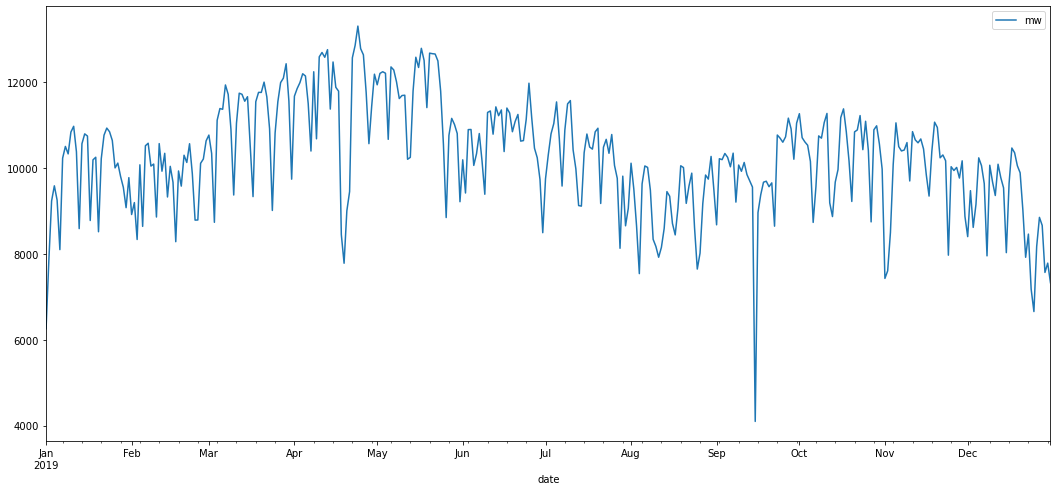

In [359]:
x.plot(x='date',y='mw')
plt.show()

In [360]:
import statsmodels.api as sm
from pylab import rcParams

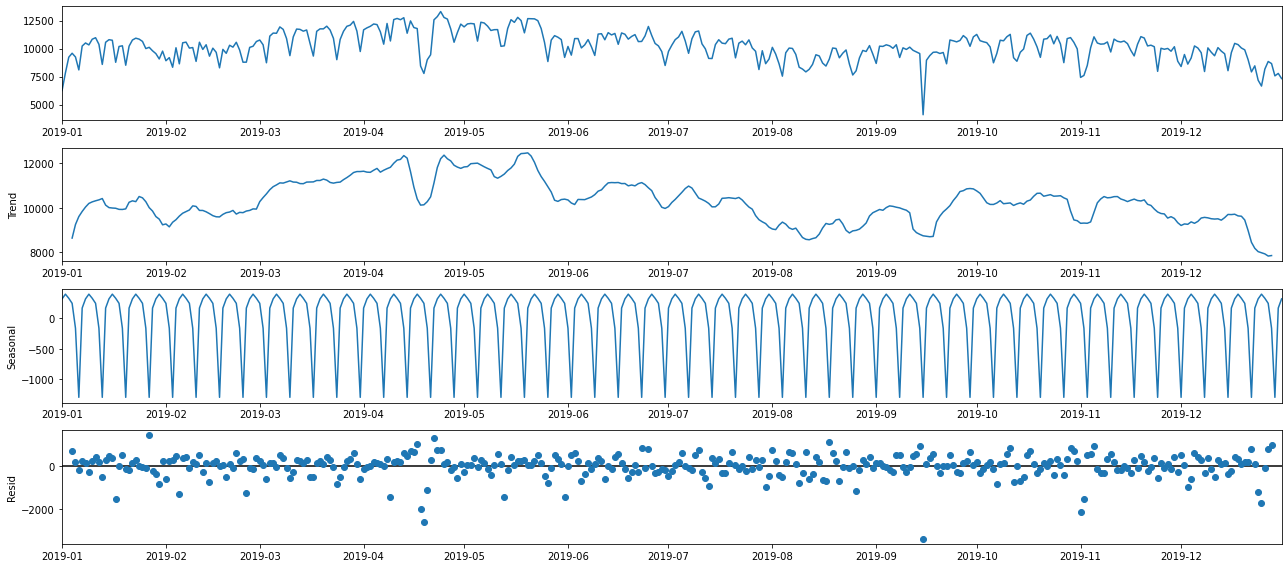

In [365]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(Daily2PACO_T1L1.set_index('date'), model='additive')
fig = decomposition.plot()
plt.show()

In [366]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [367]:
Daily2PACO_T1L1

,date,mw
0,2019-01-01,6256.5
1,2019-01-02,7839.0
2,2019-01-03,9231.9
3,2019-01-04,9584.4
4,2019-01-05,9251.2
...,...,...
360,2019-12-27,8849.4
361,2019-12-28,8662.3
362,2019-12-29,7567.3
363,2019-12-30,7783.9


In [370]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(Daily2PACO_T1L1.set_index('date'),order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            print ('AIC-order: {}' .format(res.aic_min_order))
        except:
            continue


nda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\William\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\William\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\William\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\William\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provide

In [373]:
mod = sm.tsa.statespace.SARIMAX(Daily2PACO_T1L1.set_index('date'),order=(1, 0, 1),seasonal_order=(1, 1, 1, 12),enforce_stationarity=False,enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

C:\Users\William\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\William\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8436      0.036     23.344      0.000       0.773       0.914
ma.L1         -0.2502      0.050     -5.014      0.000      -0.348      -0.152
ar.S.L12      -0.0201      0.065     -0.307      0.759      -0.148       0.108
ma.S.L12      -0.9913      0.315     -3.150      0.002      -1.608      -0.374
sigma2      8.519e+05   2.51e+05      3.388      0.001    3.59e+05    1.34e+06


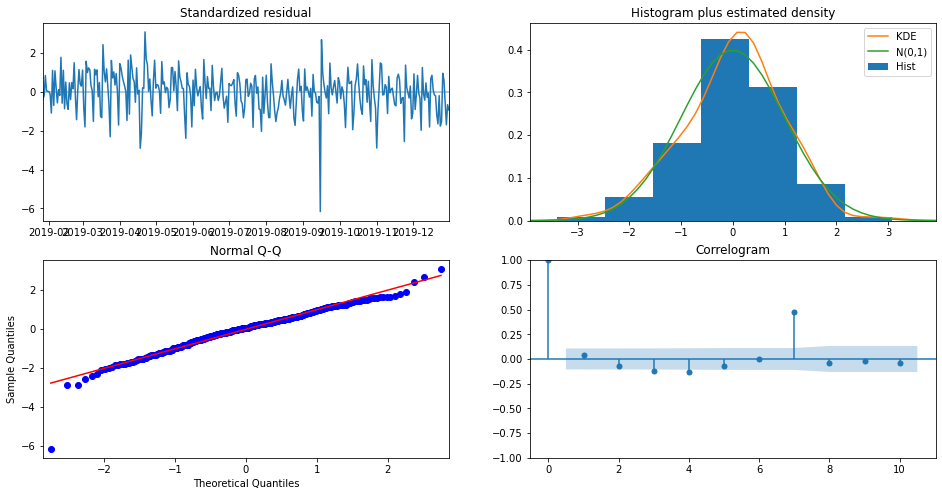

In [375]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

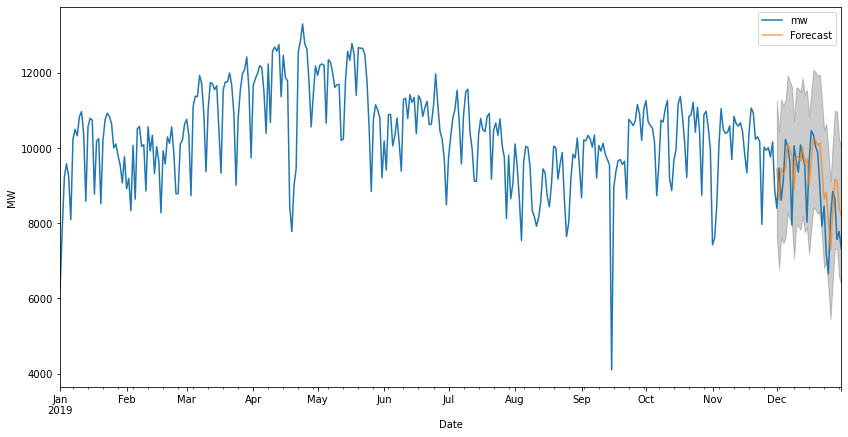

In [377]:
pred = results.get_prediction(start=pd.to_datetime('2019-12-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = Daily2PACO_T1L1.set_index('date')['2019':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('MW')
plt.legend()
plt.show()

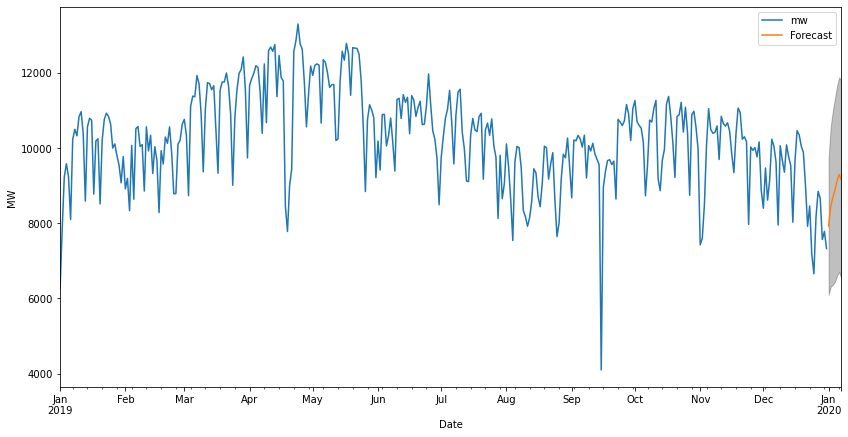

In [379]:
pred_uc = results.get_forecast(steps=7)
pred_ci = pred_uc.conf_int()
ax = Daily2PACO_T1L1.set_index('date').plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('MW')
plt.legend()
plt.show()

In [380]:
pred_ci

,lower mw,upper mw
2020-01-01,6098.230880,9760.804359
2020-01-02,6319.399112,10578.337647
2020-01-03,6360.450061,10997.343059
2020-01-04,6445.441583,11333.564180
2020-01-05,6601.193609,11660.529179
2020-01-06,6706.719313,11884.463669
2020-01-07,6534.733094,11795.124535


In [381]:
pred_ci = pred_ci.reset_index()
pred_ci = pred_ci.rename(columns={'index':'date'})
pred_ci

,date,lower mw,upper mw
0,2020-01-01,6098.230880,9760.804359
1,2020-01-02,6319.399112,10578.337647
2,2020-01-03,6360.450061,10997.343059
3,2020-01-04,6445.441583,11333.564180
4,2020-01-05,6601.193609,11660.529179
5,2020-01-06,6706.719313,11884.463669
6,2020-01-07,6534.733094,11795.124535


In [382]:
pred_ci.set_index('date')

,lower mw,upper mw
date,,
2020-01-01,6098.230880,9760.804359
2020-01-02,6319.399112,10578.337647
2020-01-03,6360.450061,10997.343059
2020-01-04,6445.441583,11333.564180
2020-01-05,6601.193609,11660.529179
2020-01-06,6706.719313,11884.463669
2020-01-07,6534.733094,11795.124535
